In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/facial-expression/fer2013.csv
/kaggle/input/facial-expression/fer2013/fer2013.csv


In [2]:
df = pd.read_csv("../input/facial-expression/fer2013.csv")
output_label = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print("Unique labels:",len(np.unique(np.array(df['emotion']))))
print("Pixel type:",type(df['pixels'][2]))
df.tail(5)

Unique labels: 7
Pixel type: <class 'str'>


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


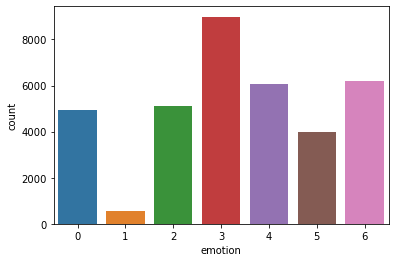

In [3]:
#number of samples per label
sns.countplot(x=df['emotion'], data=df)

In [4]:
#Convert the df['pixels'] str type to array and reshape
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

X= df['pixels'].apply(lambda x: string2array(x))
X = np.array(X)
X = np.stack(X, axis = 0)
X = X/255.0
y = np.array(df['emotion'])

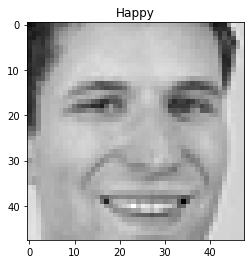

In [5]:
#sample image
img_no = 1246 #image number range(0,35k)
img = X[img_no].reshape(48,48)
plt.figure()
plt.title(output_label[y[img_no]])
plt.imshow(img, cmap = 'gray')

In [6]:
#convert numpy array to categorical 
from keras.utils import to_categorical
y = to_categorical(y)
print(X.shape,y.shape)

(35887, 48, 48, 1) (35887, 7)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, shuffle = True)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(26915, 48, 48, 1) (26915, 7)
(8972, 48, 48, 1) (8972, 7)


In [9]:
from keras.layers import Dense
from keras.layers import Conv2D, Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

#defining layers
num_classes = 7
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (4, 4),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))
    
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [10]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    validation_split = 0.25,
    fill_mode="nearest")

In [13]:
model.fit(aug.flow(x_train, y_train, batch_size=64),
            epochs=20, 
            verbose=1, 
            shuffle=True,
            )

Epoch 1/20
421/421 [==============================] - 1370s 3s/step - loss: 1.7385 - accuracy: 0.3030
Epoch 2/20
421/421 [==============================] - 1363s 3s/step - loss: 1.5630 - accuracy: 0.3891
Epoch 3/20
421/421 [==============================] - 1349s 3s/step - loss: 1.3959 - accuracy: 0.4615
Epoch 4/20
421/421 [==============================] - 1357s 3s/step - loss: 1.2954 - accuracy: 0.5083
Epoch 5/20
421/421 [==============================] - 1351s 3s/step - loss: 1.2348 - accuracy: 0.5326
Epoch 6/20
421/421 [==============================] - 1351s 3s/step - loss: 1.1893 - accuracy: 0.5480
Epoch 7/20
421/421 [==============================] - 1347s 3s/step - loss: 1.1540 - accuracy: 0.5642
Epoch 8/20
421/421 [==============================] - 1348s 3s/step - loss: 1.1249 - accuracy: 0.5735
Epoch 9/20
421/421 [==============================] - 1348s 3s/step - loss: 1.0927 - accuracy: 0.5889
Epoch 10/20
421/421 [==============================] - 1341s 3s/step - loss: 1.069

In [12]:
preds = model.predict(x_test, verbose=1)

281/281 [==============================] - 110s 390ms/step


In [16]:
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

Accuracy score:  0.0
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1225
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00      1241
           3       0.00      0.00      0.00      2294
           4       0.00      0.00      0.00      1507
           5       0.00      0.00      0.00      1001
           6       0.00      0.00      0.00      1566

   micro avg       0.00      0.00      0.00      8972
   macro avg       0.00      0.00      0.00      8972
weighted avg       0.00      0.00      0.00      8972
 samples avg       0.00      0.00      0.00      8972



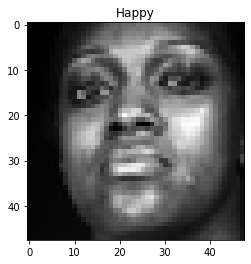

In [15]:
#sample image
img_no = 6 #image number range(0,8972)
img = x_test[img_no].reshape(48,48)
plt.figure()
plt.title(output_label[np.argmax(preds[img_no])])
plt.imshow(img, cmap='gray')